In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import requests
from io import BytesIO
from zipfile import ZipFile
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [18]:
def download_and_unzip(url, extract_to='.'):
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes

    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall(extract_to)

url = 'https://archive.ics.uci.edu/static/public/601/ai4i+2020+predictive+maintenance+dataset.zip'
download_and_unzip(url)


In [19]:
data = pd.read_csv("ai4i2020.csv")
data.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [20]:
X = data[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]",
          "Torque [Nm]", "Tool wear [min]"]]
y = data["Machine failure"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9865
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1942
           1       0.84      0.66      0.74        58

    accuracy                           0.99      2000
   macro avg       0.92      0.83      0.87      2000
weighted avg       0.99      0.99      0.99      2000



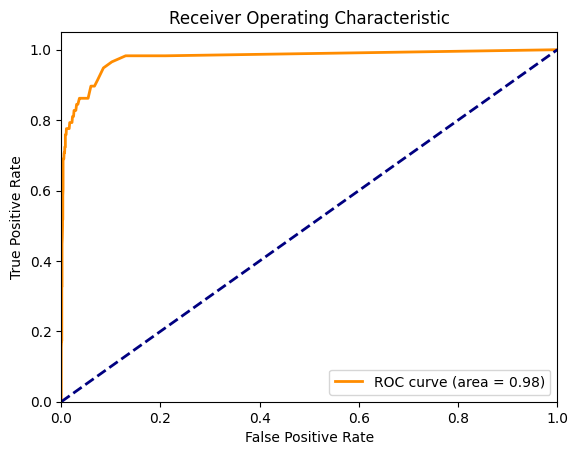

In [26]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()